## __Author__ : Diba Elahi
## __Course__ : Machine Learning
## __Assignment No. 2__

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

### You need to conduct exploratory data analysis to gain insights from your data. (Which may occur during the feature engineering phase.)
### You should perform data cleaning and feature engineering on the dataset, and describe each step you take and why in the process in your Jupyter notebook or a separate document.

__Note__ : These two first tasks are related and as it was allowed in the task description, I will perform them together and conduct my EDA ingrained with feature engineering.

In [ ]:
df = pd.read_csv("Data/train.csv")

__Explanation__ : In the code sections below, I first tried to get an insight about dataset by df.head() method that allow me to capture 5 first samples.
Then I tried to explore dataset more by knowing its shape, its columns, exploring the datatype of each column and getting intuition about null values.
And using describe method we can see more statistical information about numerical features.

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
df.shape

(8693, 14)

In [ ]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


__Explanation__ : The code section below hepls me to understand if my data is imbalance. In this dataset the plot shows that the distribution of Transported is balanced.

<AxesSubplot:>

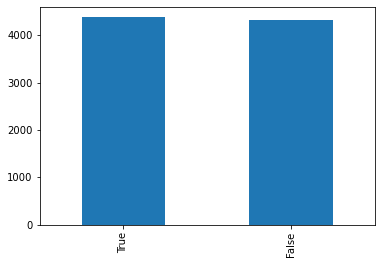

In [ ]:
plot_df = df.Transported.value_counts()
plot_df.plot(kind="bar")

__Explanation__ : Then I will try to plot data distribution over different features, and output class because knwoing the distribution of data and help me have better insight about data.

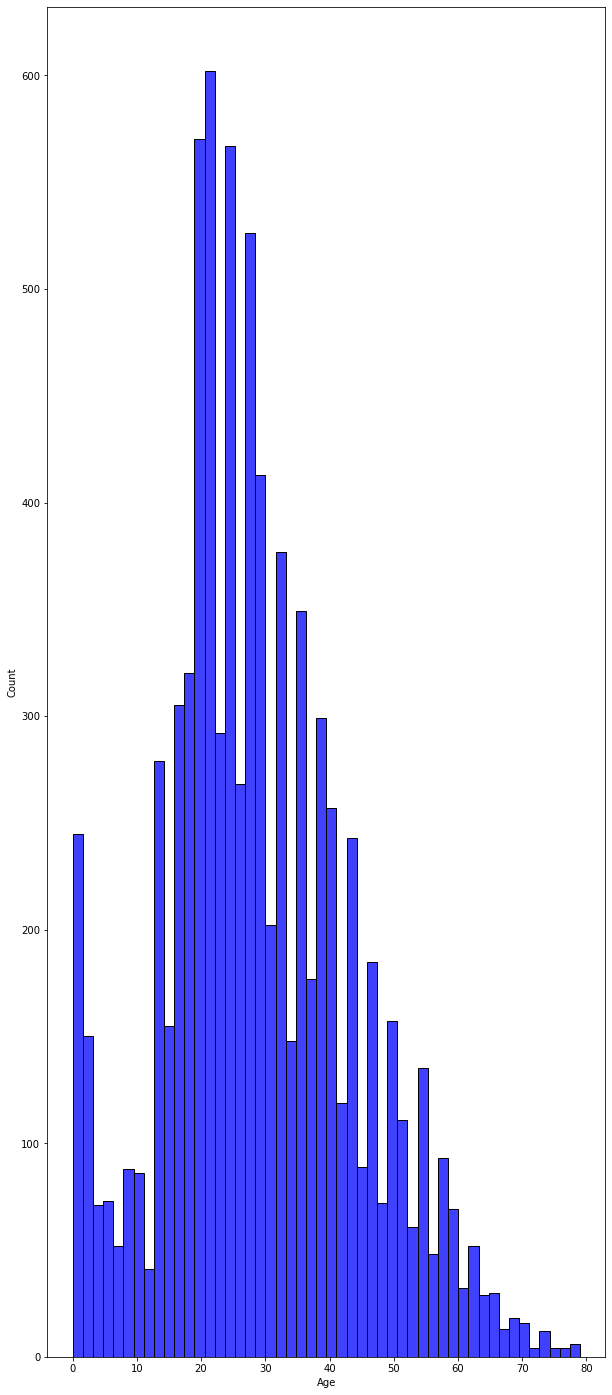

In [ ]:
fig, ax = plt.subplots(1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(df['Age'], color='b', bins=50, ax=ax);

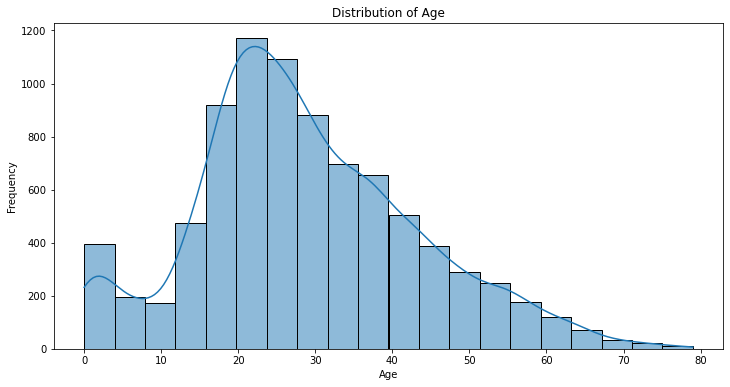

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

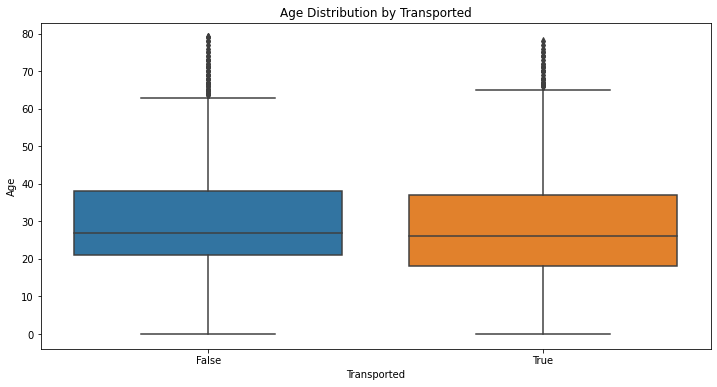

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Transported', y='Age', data=df)
plt.title('Age Distribution by Transported')
plt.xlabel('Transported')
plt.ylabel('Age')
plt.show()

__Explanation__ : Right now, none of original columns are dropped. So if we have any duplication in our dataset, it means that our record has a problem, so we will remove all duplications if available.

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(8693, 14)

__Explanation__ : PassengerId and Name seems to be unrelavent data in our prediction task. I drop them

In [ ]:
#df.drop(['PassengerId', 'Name'], axis=1, inplace=True)
df.drop(['Name'], axis=1, inplace=True)
encoder = LabelEncoder()
df['PassengerId'] = encoder.fit_transform(df['PassengerId'])

__Explanation__ : In order to train a model, we first need to encode categorical features if available and in this particular dataset we have 6 categorical features, HomePlanet, CryoSleep, Cabin, Destination, VIP, Transported. In order to find the best encoding method at first I need to know all the unique values for each feature.   

In [ ]:
df["HomePlanet"].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [ ]:
df["CryoSleep"].unique()

array([False, True, nan], dtype=object)

In [ ]:
df["Cabin"].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [ ]:
df["Destination"].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [ ]:
df["VIP"].unique()

array([False, True, nan], dtype=object)

In [ ]:
df["Transported"].unique()

array([False,  True])

__Explanation__ : After exploring unique values of each feature, I will decide how to encode them and what type of encoder is better.
For features that only contain True/Fasle best encoder method is label encoding. (nan values are considered in unique values because of null values, so first I need to handle them.) As i checked my data, by dropping them I roughly loose 20% of my data. So I decided to impute the missing values.

__Note__ : I decided to drop samples that has null values as Cabin.

__Explanation__ : For other features I decided to impute missing values. I used SimpleImputer but for numerical features I used mean and my strategy and for categoricals I used most frequent.

In [ ]:
df.dropna(subset=['Cabin'], inplace=True)

In [ ]:
numerical_imputer = SimpleImputer(strategy='mean')
features_with_missing = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df[features_with_missing] = numerical_imputer.fit_transform(df[features_with_missing])

In [ ]:
categorical_imputer = SimpleImputer(strategy='most_frequent')
features_with_missing = ['HomePlanet', 'CryoSleep', 'VIP', 'Destination']
df[features_with_missing] = categorical_imputer.fit_transform(df[features_with_missing])

In [ ]:
df.shape

(8494, 13)

In [ ]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

__Explanation__ : Now I can perform encoding categorical features.

__Note__ : Label enconding for binary features and also for HomePlanet and Destination I decided to use label encoder:

In [ ]:
encoder = LabelEncoder()
df['HomePlanet'] = encoder.fit_transform(df['HomePlanet'])
df['CryoSleep'] = encoder.fit_transform(df['CryoSleep'])
df['VIP'] = encoder.fit_transform(df['VIP'])
df['Transported'] = encoder.fit_transform(df['Transported'])
df['Destination'] = encoder.fit_transform(df['Destination'])

__Explanation__ : In the code sections below I tried to extract some information about Cabin deck, cabin number, and cabin side by splitting the cabin feature.

In [ ]:
var = df['Cabin'].apply(lambda x: x.split('/') if type(x) != float else ['-1', '-1', '-1']).to_list()
var = np.array(var)
var

array([['B', '0', 'P'],
       ['F', '0', 'S'],
       ['A', '0', 'S'],
       ...,
       ['G', '1500', 'S'],
       ['E', '608', 'S'],
       ['E', '608', 'S']], dtype='<U4')

In [ ]:
df['Cabin_deck'] = tmp[:, 0]
df['Cabin_num'] = tmp[:, 1]
df['Cabin_side'] = tmp[:, 2]
df.drop(columns='Cabin', inplace=True)

In [ ]:
df.loc[df['Cabin_deck']=='-1', 'Cabin_deck'] = np.random.choice(['F', 'G'], sum(df['Cabin_deck']=='-1'), p=[0.5, 0.5])

In [ ]:
df['Cabin_deck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin_deck, dtype: int64

In [ ]:
df['Cabin_deck'].value_counts(normalize=True)

F    0.328938
G    0.301271
E    0.103132
B    0.091712
C    0.087944
D    0.056275
A    0.030139
T    0.000589
Name: Cabin_deck, dtype: float64

In [ ]:
df['Cabin_num'].nunique()

1817

In [ ]:
df['Cabin_num'] = df['Cabin_num'].astype(int)
df.loc[df['Cabin_num']=='-1', 'Cabin_num'] = int(df['Cabin_num'].mean())

In [ ]:
df.loc[df['Cabin_side']=='-1', 'Cabin_side'] = np.random.choice(['S', 'P'], sum(df['Cabin_side']=='-1'),
                                                              p=[0.5, 0.5])
df['Cabin_side'] = df['Cabin_side'].map({'S':0, 'P':1})
df['Cabin_side'].value_counts()

0    4288
1    4206
Name: Cabin_side, dtype: int64

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_num,Cabin_side
0,0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,1
1,1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,0
2,2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,0
3,3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,0
4,4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,0


__Explanation__ : Because Cabin Side id not numerical, I encode it.

In [ ]:
encoder = LabelEncoder()
df['Cabin_deck'] = encoder.fit_transform(df['Cabin_deck'])

In [ ]:
df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_num,Cabin_side
0,0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
1,1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,0,0
2,2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,0
3,3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,0
4,4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,98,1
8689,8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,6,1499,0
8690,8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,6,1500,0
8691,8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,4,608,0


__Explanation__ : For furthur exploration on the data I tried to plot the distribution of the Age for each planet.

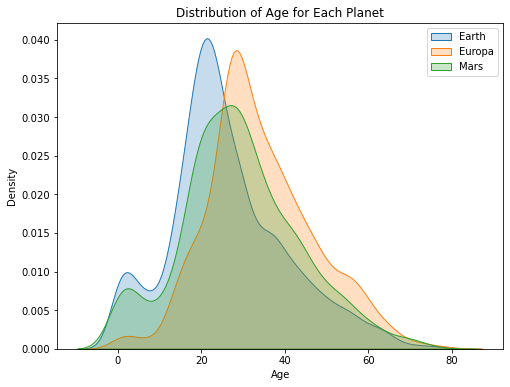

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['HomePlanet'] == 0]['Age'], label='Earth', shade=True)
sns.kdeplot(df[df['HomePlanet'] == 1]['Age'], label='Europa', shade=True)
sns.kdeplot(df[df['HomePlanet'] == 2]['Age'], label='Mars', shade=True)

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Age for Each Planet')
plt.legend()
plt.show()

__Explanation__ : Then for having more insight on the data distribution I plot the distribution of each planet based on the output.

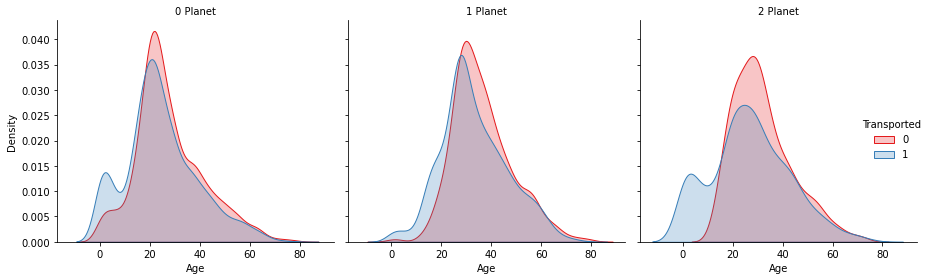

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(df, col="HomePlanet", hue="Transported", palette="Set1", col_wrap=3, height=4)
g.map(sns.kdeplot, "Age", shade=True)
g.add_legend()

g.set_axis_labels("Age", "Density")
g.set_titles("{col_name} Planet")
plt.tight_layout()
plt.show()

__Explanation__ : I decide to plot the pairplot of each feature and then perform outlier removal and then plot again to see the difference that is made by outlier removal. Outliers are data points that deviate significantly from the rest of the distribution. They can affect the accuracy and validity of your analysis, especially if they are caused by errors, anomalies, or extreme values. I used percentile removal to remove outliers.

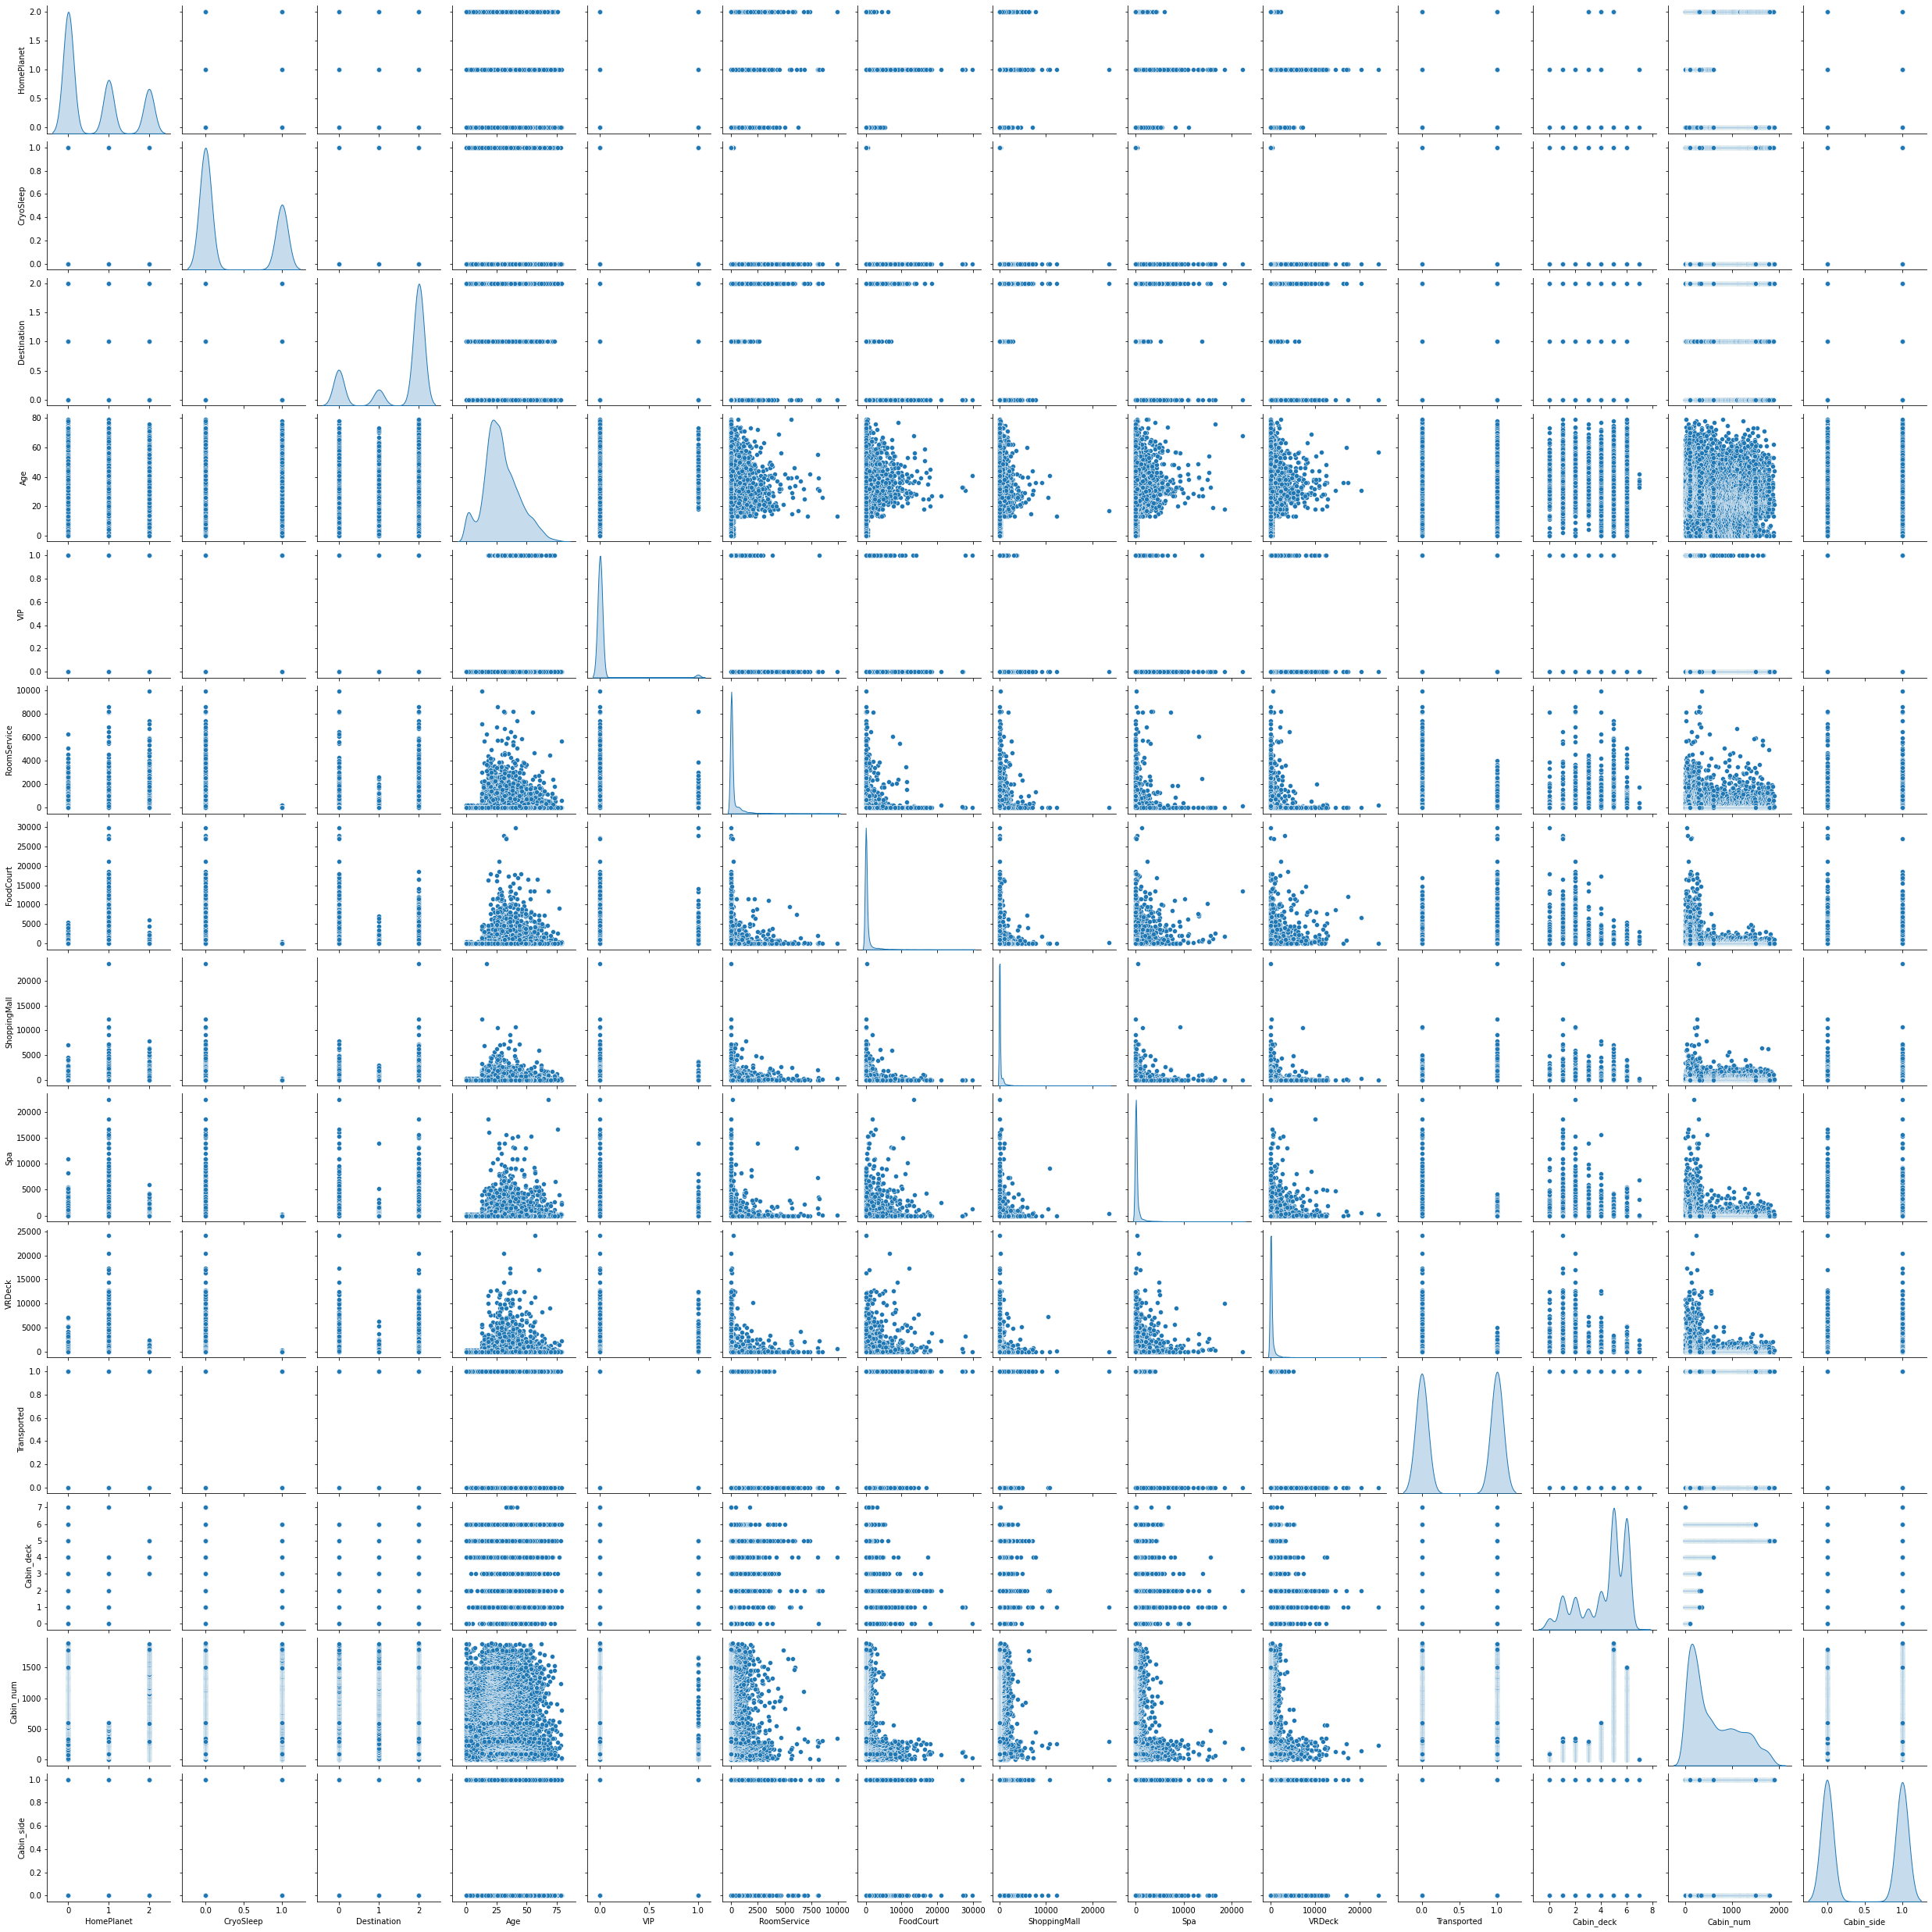

In [ ]:
sns.pairplot(df, diag_kind='kde')

In [ ]:
def outlier_removal(data):
    drop_outliers = np.array([])
    for col in data.columns:
        upper_bound = data[col].quantile(0.99)
        lower_bound = data[col].quantile(0.01)

        df = data[col]
        indices = df[(df < lower_bound) | (df > upper_bound)].index
        drop_outliers = np.append(drop_outliers, indices)
    return drop_outliers

In [ ]:
cleaned_df = df.copy()
drop = outlier_removal(cleaned_df)
dropped = np.unique(drop)
cleaned_df.drop(dropped, inplace=True)
cleaned_df.shape

(7759, 15)

In [ ]:
cleaned_df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Cabin_deck      0
Cabin_num       0
Cabin_side      0
dtype: int64

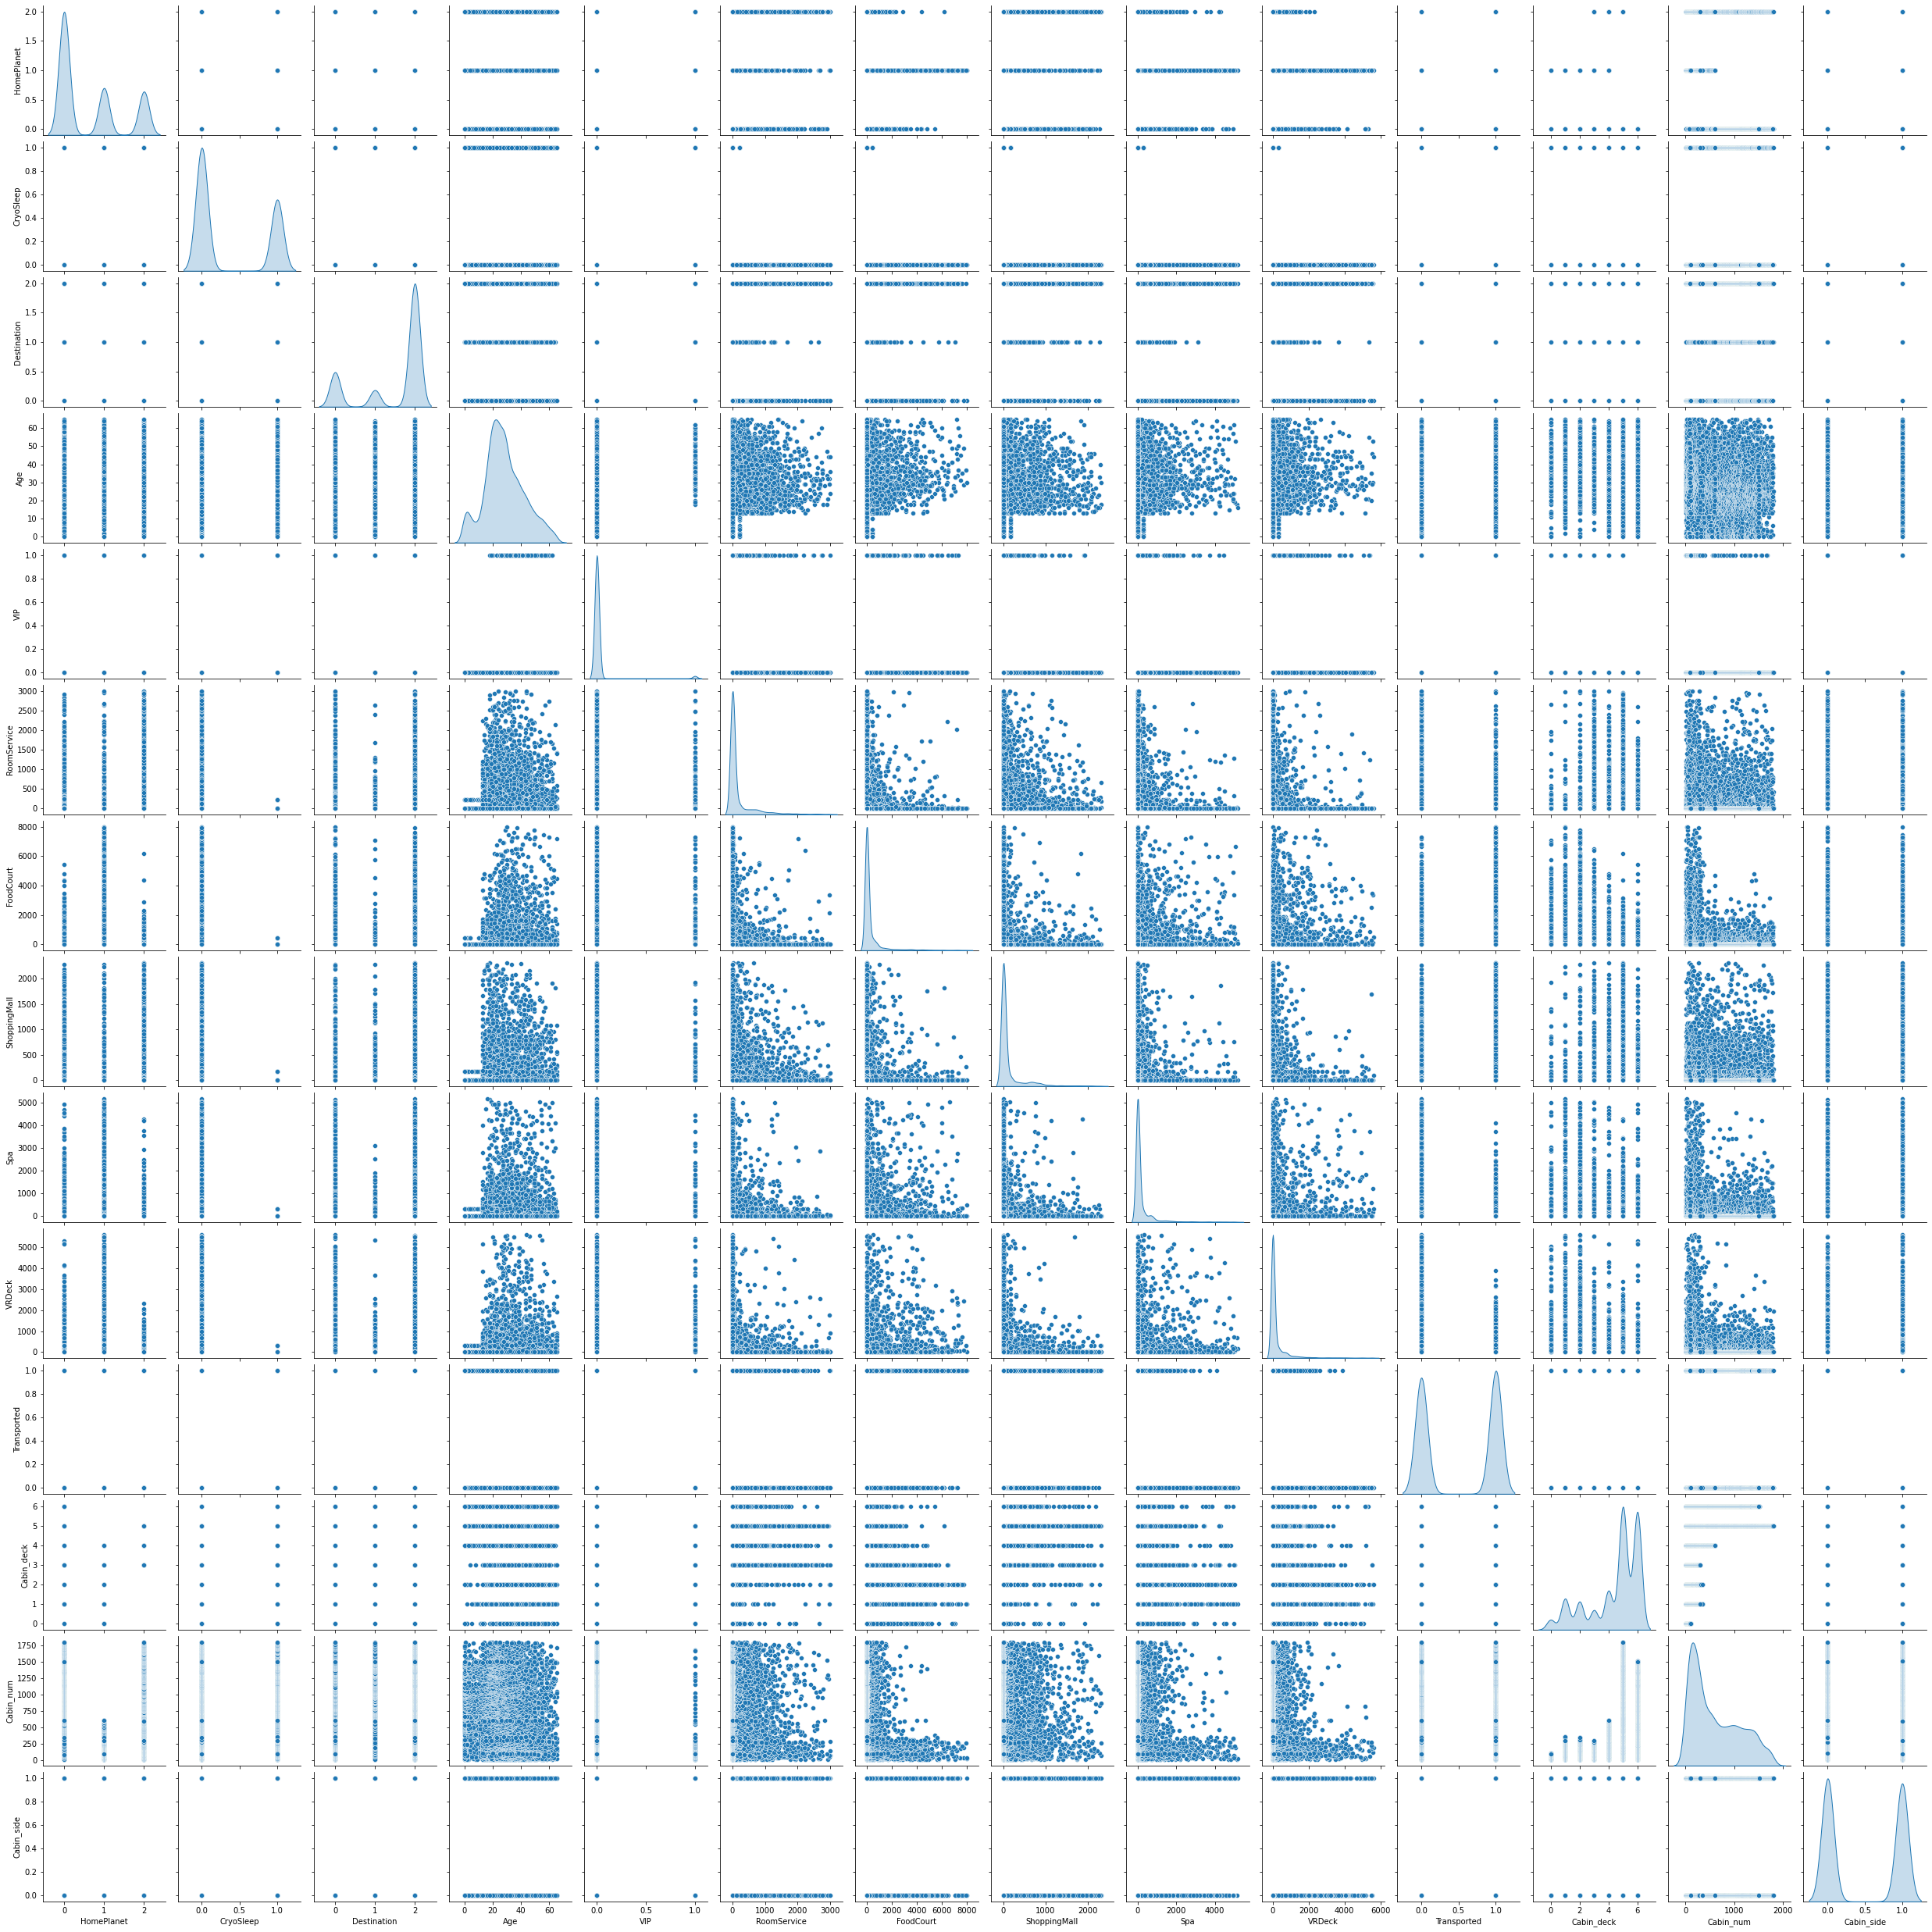

In [ ]:
sns.pairplot(cleaned_df, diag_kind='kde')

In [ ]:
original_numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'HomePlanet', 'CryoSleep', 'Destination', 'VIP',
       'Cabin_deck', 'Cabin_num', 'Cabin_side', 'PassengerId']

In [ ]:
cleaned_df.describe()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_num,Cabin_side
count,7759.000000,7759.000000,7759.000000,7759.000000,7759.000000,7759.000000,7759.000000,7759.000000,7759.000000,7759.000000,7759.000000,7759.000000,7759.000000,7759.000000,7759.000000
mean,4329.530481,0.626756,0.366671,1.508055,28.156640,0.019719,179.089002,310.516662,132.533677,205.922323,204.597443,0.513855,4.401469,606.562057,0.490656
std,2432.084213,0.800641,0.481927,0.804349,13.881142,0.139042,433.786852,921.247889,330.965200,600.087257,607.730258,0.499840,1.733703,495.724376,0.499945
min,86.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,2229.500000,0.000000,0.000000,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,181.000000,0.000000
50%,4324.000000,0.000000,0.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,453.000000,0.000000
75%,6424.500000,1.000000,1.000000,2.000000,37.000000,0.000000,66.000000,59.000000,34.000000,56.000000,43.500000,1.000000,6.000000,1001.000000,1.000000
max,8606.000000,2.000000,1.000000,2.000000,65.000000,1.000000,3010.000000,7992.000000,2316.000000,5183.000000,5615.000000,1.000000,6.000000,1794.000000,1.000000


__Explanation__ : Scaling is a crucial preprocessing step in machine learning workflows, particularly when dealing with numerical features that have different scales or units. Scaling ensures that all features contribute equally to the model fitting process and prevents features with larger magnitudes from dominating the learning algorithm. Min-Max scaling is a popular method for scaling numerical features to a specific range, typically between 0 and 1. Min-Max scaling preserves the relative relationships between values within each feature while ensuring that all values fall within the specified range.

In [ ]:
minmax_scaler = MinMaxScaler()
cleaned_df = pd.DataFrame(minmax_scaler.fit_transform(cleaned_df[original_numerical_columns]), columns=original_numerical_columns)

In [ ]:
cleaned_df

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet,CryoSleep,Destination,VIP,Cabin_deck,Cabin_num,Cabin_side,PassengerId
0,0.000000,0.000000,0.000000,0.075432,0.000000,0.000000,1.0,0.0,1.0,1.0,0.0,1.000000,0.001678,1.0,0.000000
1,0.046154,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,1.0,1.0,0.0,1.000000,0.001678,1.0,0.000117
2,0.400000,0.000000,0.107107,0.002159,0.006174,0.000000,0.0,0.0,0.0,1.0,0.0,1.000000,0.002796,1.0,0.000352
3,0.400000,0.000000,0.351727,0.413212,0.000000,0.015494,1.0,0.0,0.0,1.0,0.0,1.000000,0.002796,1.0,0.000469
4,0.353846,0.103322,0.053428,0.227116,0.007139,0.000000,0.0,0.0,0.0,0.5,0.0,0.833333,0.007271,1.0,0.000587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7754,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,1.0,1.0,0.0,1.000000,0.832215,1.0,0.999413
7755,0.569231,0.049169,0.000000,0.295337,0.278989,0.015672,0.0,1.0,0.0,1.0,0.0,0.833333,0.988814,0.0,0.999531
7756,0.538462,0.089701,0.000501,0.195596,0.001351,0.000000,1.0,0.0,0.0,1.0,0.0,0.833333,0.989374,0.0,0.999648
7757,0.430769,0.000000,0.000876,0.002591,0.000000,0.085841,0.0,0.0,0.0,1.0,0.0,1.000000,0.824385,0.0,0.999883


In [ ]:
cleaned_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet,CryoSleep,Destination,VIP,Cabin_deck,Cabin_num,Cabin_side,PassengerId
count,7759.000000,7759.000000,7759.000000,7759.000000,7759.000000,7759.000000,7759.000000,7759.000000,7759.000000,7759.000000,7759.000000,7759.000000,7759.000000,7759.000000,7759.000000
mean,0.433179,0.059498,0.038853,0.057225,0.039730,0.036438,0.513855,0.313378,0.366671,0.754028,0.019719,0.733578,0.335885,0.490656,0.498067
std,0.213556,0.144115,0.115271,0.142904,0.115780,0.108233,0.499840,0.400321,0.481927,0.402174,0.139042,0.288951,0.277251,0.499945,0.285456
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.292308,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.666667,0.097875,0.000000,0.251585
50%,0.415385,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.833333,0.250000,0.000000,0.497418
75%,0.569231,0.021927,0.007382,0.014680,0.010805,0.007747,1.000000,0.500000,1.000000,1.000000,0.000000,1.000000,0.556488,1.000000,0.743955
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cleaned_df.isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
HomePlanet      0
CryoSleep       0
Destination     0
VIP             0
Cabin_deck      0
Cabin_num       0
Cabin_side      0
PassengerId     0
dtype: int64

__Explanation__ : The code section below performs feature engineering to create new features and categorize spending behavior based on the total spending amount.

In [ ]:
cleaned_df['TotalSpending'] = cleaned_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
cleaned_df['RelativeSpending_Spa'] = cleaned_df['Spa'] / cleaned_df['TotalSpending']
cleaned_df['Interaction_Spa_VRDeck'] = cleaned_df['Spa'] * cleaned_df['VRDeck']
bins = [0, 100, 500, 1000, float('inf')]
labels = ['Low', 'Moderate', 'High', 'Very High']
cleaned_df['SpendingCategory'] = pd.cut(cleaned_df['TotalSpending'], bins=bins, labels=labels)


In [ ]:
cleaned_df

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet,CryoSleep,Destination,VIP,Cabin_deck,Cabin_num,Cabin_side,PassengerId,TotalSpending,RelativeSpending_Spa,Interaction_Spa_VRDeck,SpendingCategory
0,0.000000,0.000000,0.000000,0.075432,0.000000,0.000000,1.0,0.0,1.0,1.0,0.0,1.000000,0.001678,1.0,0.000000,0.075432,0.000000,0.000000,Low
1,0.046154,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,1.0,1.0,0.0,1.000000,0.001678,1.0,0.000117,0.000000,NaN,0.000000,NaN
2,0.400000,0.000000,0.107107,0.002159,0.006174,0.000000,0.0,0.0,0.0,1.0,0.0,1.000000,0.002796,1.0,0.000352,0.115440,0.053483,0.000000,Low
3,0.400000,0.000000,0.351727,0.413212,0.000000,0.015494,1.0,0.0,0.0,1.0,0.0,1.000000,0.002796,1.0,0.000469,0.780433,0.000000,0.000000,Low
4,0.353846,0.103322,0.053428,0.227116,0.007139,0.000000,0.0,0.0,0.0,0.5,0.0,0.833333,0.007271,1.0,0.000587,0.391005,0.018257,0.000000,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7754,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,1.0,1.0,0.0,1.000000,0.832215,1.0,0.999413,0.000000,NaN,0.000000,NaN
7755,0.569231,0.049169,0.000000,0.295337,0.278989,0.015672,0.0,1.0,0.0,1.0,0.0,0.833333,0.988814,0.0,0.999531,0.639168,0.436488,0.004372,Low
7756,0.538462,0.089701,0.000501,0.195596,0.001351,0.000000,1.0,0.0,0.0,1.0,0.0,0.833333,0.989374,0.0,0.999648,0.287148,0.004703,0.000000,Low
7757,0.430769,0.000000,0.000876,0.002591,0.000000,0.085841,0.0,0.0,0.0,1.0,0.0,1.000000,0.824385,0.0,0.999883,0.089308,0.000000,0.000000,Low


In [ ]:
cleaned_df.isnull().sum()

Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
HomePlanet                   0
CryoSleep                    0
Destination                  0
VIP                          0
Cabin_deck                   0
Cabin_num                    0
Cabin_side                   0
PassengerId                  0
TotalSpending                0
RelativeSpending_Spa      3047
Interaction_Spa_VRDeck       0
SpendingCategory          3047
dtype: int64

__Explanation__ : Our new features include null values so I handle them the same as other features imputation I did.

In [ ]:
numerical_imputer = SimpleImputer(strategy='mean')
features_with_missing = ['RelativeSpending_Spa']
cleaned_df[features_with_missing] = numerical_imputer.fit_transform(cleaned_df[features_with_missing])

In [ ]:
categorical_imputer = SimpleImputer(strategy='most_frequent')
features_with_missing = ['SpendingCategory']
cleaned_df[features_with_missing] = categorical_imputer.fit_transform(cleaned_df[features_with_missing])

In [ ]:
cleaned_df.isnull().sum()

Age                       0
RoomService               0
FoodCourt                 0
ShoppingMall              0
Spa                       0
VRDeck                    0
Transported               0
HomePlanet                0
CryoSleep                 0
Destination               0
VIP                       0
Cabin_deck                0
Cabin_num                 0
Cabin_side                0
PassengerId               0
TotalSpending             0
RelativeSpending_Spa      0
Interaction_Spa_VRDeck    0
SpendingCategory          0
dtype: int64

In [ ]:
encoder = LabelEncoder()
cleaned_df['SpendingCategory'] = encoder.fit_transform(cleaned_df['SpendingCategory'])

In [ ]:
cleaned_df

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet,CryoSleep,Destination,VIP,Cabin_deck,Cabin_num,Cabin_side,PassengerId,TotalSpending,RelativeSpending_Spa,Interaction_Spa_VRDeck,SpendingCategory
0,0.000000,0.000000,0.000000,0.075432,0.000000,0.000000,1.0,0.0,1.0,1.0,0.0,1.000000,0.001678,1.0,0.000000,0.075432,0.000000,0.000000,0
1,0.046154,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,1.0,1.0,0.0,1.000000,0.001678,1.0,0.000117,0.000000,0.180690,0.000000,0
2,0.400000,0.000000,0.107107,0.002159,0.006174,0.000000,0.0,0.0,0.0,1.0,0.0,1.000000,0.002796,1.0,0.000352,0.115440,0.053483,0.000000,0
3,0.400000,0.000000,0.351727,0.413212,0.000000,0.015494,1.0,0.0,0.0,1.0,0.0,1.000000,0.002796,1.0,0.000469,0.780433,0.000000,0.000000,0
4,0.353846,0.103322,0.053428,0.227116,0.007139,0.000000,0.0,0.0,0.0,0.5,0.0,0.833333,0.007271,1.0,0.000587,0.391005,0.018257,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7754,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,1.0,1.0,0.0,1.000000,0.832215,1.0,0.999413,0.000000,0.180690,0.000000,0
7755,0.569231,0.049169,0.000000,0.295337,0.278989,0.015672,0.0,1.0,0.0,1.0,0.0,0.833333,0.988814,0.0,0.999531,0.639168,0.436488,0.004372,0
7756,0.538462,0.089701,0.000501,0.195596,0.001351,0.000000,1.0,0.0,0.0,1.0,0.0,0.833333,0.989374,0.0,0.999648,0.287148,0.004703,0.000000,0
7757,0.430769,0.000000,0.000876,0.002591,0.000000,0.085841,0.0,0.0,0.0,1.0,0.0,1.000000,0.824385,0.0,0.999883,0.089308,0.000000,0.000000,0


In [ ]:
cleaned_df.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'HomePlanet', 'CryoSleep', 'Destination', 'VIP',
       'Cabin_deck', 'Cabin_num', 'Cabin_side', 'PassengerId', 'TotalSpending',
       'RelativeSpending_Spa', 'Interaction_Spa_VRDeck', 'SpendingCategory'],
      dtype='object')

In [ ]:
cleaned_df['Transported'] = cleaned_df['Transported']

<Figure size 720x576 with 0 Axes>

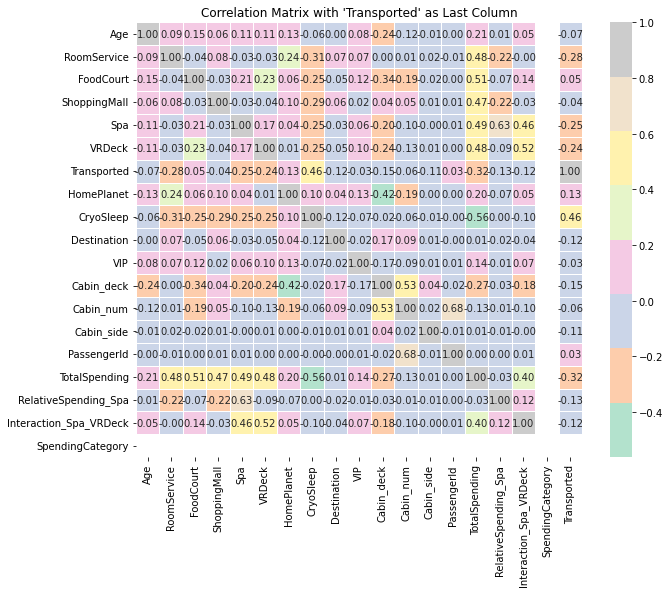

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = cleaned_df.corr()
columns_reordered = list(corr_matrix.columns)
columns_reordered.remove('Transported')
columns_reordered.append('Transported')
corr_matrix_reordered = corr_matrix.reindex(columns=columns_reordered)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_reordered, annot=True, cmap='Pastel2', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix with '{}' as Last Column".format('Transported'))
plt.show()

In [ ]:
data_types = cleaned_df.dtypes

# Filter columns with non-numeric data types
categorical_columns = data_types[data_types == 'object'].index.tolist()

# Display the list of categorical columns
print("Categorical columns:", categorical_columns)

Categorical columns: []


### It is necessary to train and evaluate an arbitrary model before and after feature engineering to examine the effect of your modifications on model’s performance.


__Explanation__ : I decided to train a Logistic Regression Model. I use cross validation for evaluation.

In [ ]:
logistic_regression_cleaned_data = LogisticRegression(max_iter=10000, random_state=42)

In [ ]:
X = cleaned_df.drop(['Transported'], axis=1)

In [ ]:
Y = cleaned_df['Transported']

In [ ]:
cv_results = cross_validate(logistic_regression_cleaned_data, X, Y, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
accuracy_scores = cv_results['test_accuracy']
precision_scores = cv_results['test_precision']
recall_scores = cv_results['test_recall']
f1_scores = cv_results['test_f1']

In [ ]:
print("Cross-Validation Results:")
print("Accuracy:", np.mean(accuracy_scores))
print("Precision:", np.mean(precision_scores))
print("Recall:", np.mean(recall_scores))
print("F1-score:", np.mean(f1_scores))

Cross-Validation Results:
Accuracy: 0.7713627556548153
Precision: 0.7691676198778196
Recall: 0.7973487671499954
F1-score: 0.7813037168785413


__Note__ : In the code sections below fist I load data from the csv. file for having a raw_data_frame for evaluating my model once on the raw dataset and then on the data with feature engineering and data cleaning has been done. It is noteworthy to mention that even for training model on the raw data, I need to remove null values and encode categorical values nevertheless exceptions are thrown in the model.

In [ ]:
raw_df = pd.read_csv("Data/train.csv")

In [ ]:
raw_df.dropna(subset=['Cabin'], inplace=True)
numerical_imputer = SimpleImputer(strategy='mean')
features_with_missing = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
raw_df[features_with_missing] = numerical_imputer.fit_transform(raw_df[features_with_missing])
categorical_imputer = SimpleImputer(strategy='most_frequent')
features_with_missing = ['HomePlanet', 'CryoSleep', 'VIP', 'Destination']
raw_df[features_with_missing] = categorical_imputer.fit_transform(raw_df[features_with_missing])

In [ ]:
raw_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [ ]:
raw_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            198
Transported       0
dtype: int64

In [ ]:
raw_df.drop(['Name'], axis=1, inplace=True)


In [ ]:
encoder = LabelEncoder()
raw_df['HomePlanet'] = encoder.fit_transform(raw_df['HomePlanet'])
raw_df['CryoSleep'] = encoder.fit_transform(raw_df['CryoSleep'])
raw_df['VIP'] = encoder.fit_transform(raw_df['VIP'])
raw_df['Transported'] = encoder.fit_transform(raw_df['Transported'])
raw_df['Destination'] = encoder.fit_transform(raw_df['Destination'])
raw_df['Cabin'] = encoder.fit_transform(raw_df['Cabin'])
raw_df['PassengerId'] = encoder.fit_transform(raw_df['PassengerId'])

In [ ]:
raw_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,1,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,2,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,3,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,4,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,8489,1,0,146,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,8490,0,1,5280,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8690,8491,0,0,5285,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,8492,1,0,2131,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


In [ ]:
x_raw = raw_df.drop(['Transported'], axis=1)

In [ ]:
y_raw = raw_df['Transported']

In [ ]:
logistic_regression_raw_data = LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
cv_results_raw = cross_validate(logistic_regression_raw_data, x_raw, y_raw, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
accuracy_scores = cv_results_raw['test_accuracy']
precision_scores = cv_results_raw['test_precision']
recall_scores = cv_results_raw['test_recall']
f1_scores = cv_results_raw['test_f1']

In [ ]:
print("Cross-Validation Results:")
print("Accuracy:", np.mean(accuracy_scores))
print("Precision:", np.mean(precision_scores))
print("Recall:", np.mean(recall_scores))
print("F1-score:", np.mean(f1_scores))

Cross-Validation Results:
Accuracy: 0.7826717857313696
Precision: 0.7732533036176112
Recall: 0.80740585888397
F1-score: 0.7883204504827829


### You should use cross-validation to evaluate the performance of your model and perform an ablation study on your work.

__Results__ : A machine learning model was trained on a dataset with and without feature engineering applied. The model's performance metrics were evaluated using cross-validation.

__1:__  Model without Feature Engineering:

### Cross-Validation Results:
#### Accuracy: 0.7827
#### Precision: 0.7733
#### Recall: 0.8074
#### F1-score: 0.7883
__2:__  Model with Feature Engineering:
### Cross-Validation Results:
#### Accuracy: 0.7714
#### Precision: 0.7692
#### Recall: 0.7973
#### F1-score: 0.7813

The results indicate that the model without feature engineering performs slightly better across all evaluation metrics compared to the model with feature engineering. While the differences in performance are relatively small, they suggest that the additional features introduced through feature engineering may not have provided significant improvements to the model's predictive ability in this case.